Importing dependencies

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

from tensorflow.math import confusion_matrix

In [89]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

import numpy as np
print("Unique labels:", np.unique(y_train)[:20])
print("y_train shape:", y_train.shape, "dtype:", y_train.dtype)
print("x_train shape:", x_train.shape, "dtype:", x_train.dtype)


Unique labels: [0 1 2 3 4 5 6 7 8 9]
y_train shape: (60000,) dtype: uint8
x_train shape: (60000, 28, 28) dtype: float64


In [90]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### print(x_train[10])

In [91]:
print(x_train[10].shape)

(28, 28)


2


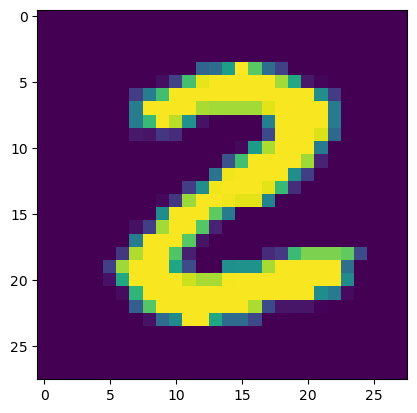

In [92]:
plt.imshow(x_train[25])
plt.show
print(y_train[25])

In [93]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [94]:
x_train = x_train/255.0
y_train = y_train/255.0

In [95]:
print(x_train[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [104]:
from keras.datasets import mnist
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.9279 - loss: 0.2441
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.9693 - loss: 0.1019
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9792 - loss: 0.0684
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.9845 - loss: 0.0496
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9883 - loss: 0.0375


In [105]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9714 - loss: 0.1025


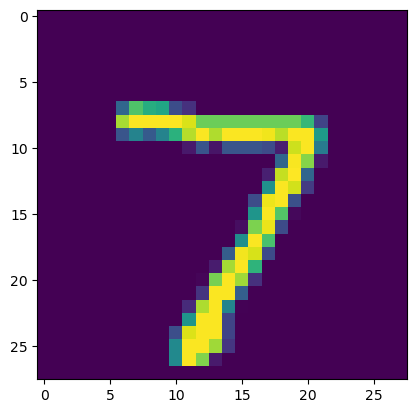

In [106]:
plt.imshow(x_test[0])

In [107]:
print(y_test[0])

7


In [108]:
Y_pred = model.predict(x_test)
#gives probablity

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


In [111]:
Y_pred.shape

(10000, 10)

In [112]:
Y_pred[0]

array([3.7751718e-08, 1.6690667e-08, 9.9164161e-08, 1.3428900e-04,
       6.7847437e-13, 3.7541142e-10, 5.8920121e-13, 9.9986327e-01,
       1.3500410e-08, 2.2020527e-06], dtype=float32)

In [115]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [119]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(4), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [122]:
conf_mat = confusion_matrix(y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 964    1    1    1    4    0    1    0    3    5]
 [   0 1116    0    5    0    0    2    2   10    0]
 [   0    2  981   14    5    0    0   19   11    0]
 [   0    0    0  996    0    1    2    5    4    2]
 [   2    0    1    0  955    0    3    9    3    9]
 [   3    1    0   32    4  838    3    0   10    1]
 [   2    2    2    1    9    5  930    1    6    0]
 [   0    1    5    3    1    0    0 1012    1    5]
 [   0    0    2    5    4    0    1    6  954    2]
 [   1    3    0    6   12    1    0   11    7  968]], shape=(10, 10), dtype=int32)


Text(0.5, 80.7222222222222, 'Predicted Labels')

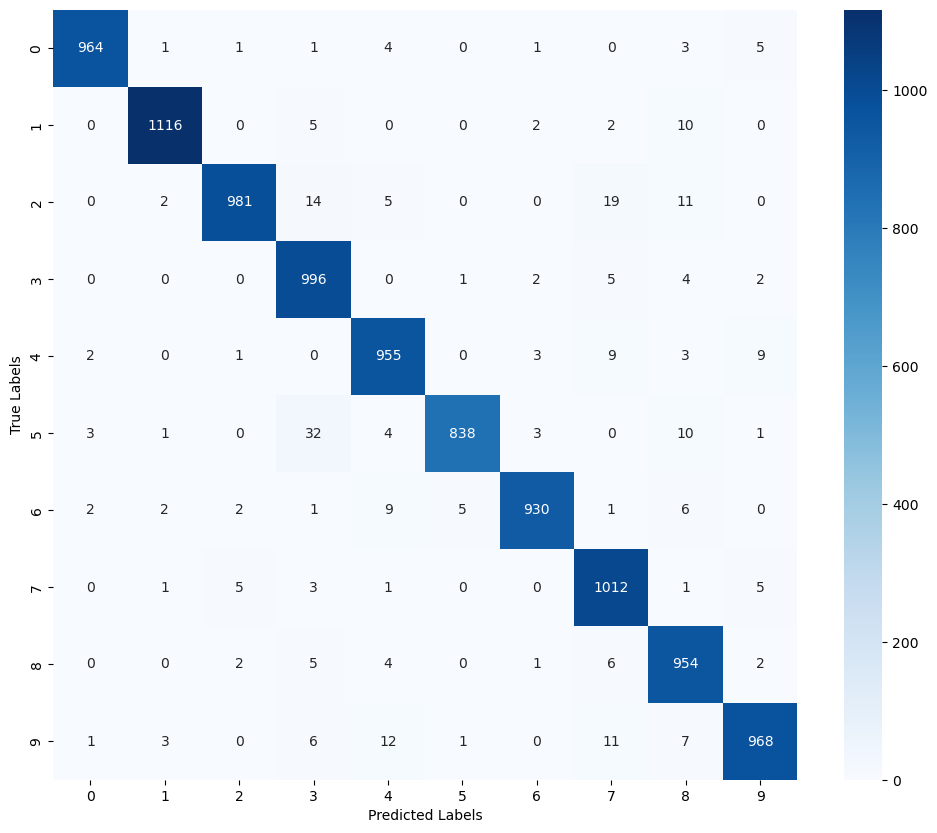

In [130]:
plt.figure(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt ='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [142]:
input_image_path = input("path of image: ")
input_image = cv2.imread(input_image_path,cv2.IMREAD_GRAYSCALE)
input_image_resize = cv2.resize(input_image,(28,28))
input_image_resize = input_image_resize/255.0
image_reshape = np.reshape(input_image_resize,[1,28,28])
input_predict = model.predict(image_reshape)
input_image_label = np.argmax(input_predict)
print('The Handwritten Digit is recognised as ', input_image_label)

path of image:  C:\\Users\\Maaz Hussain\\Pictures\\Screenshots\\Screenshot 2025-09-21 023716.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The Handwritten Digit is recognised as  3
